In [6]:
import matplotlib.pyplot as plt

In [7]:
vcf = open("out_ann.vcf")

In [8]:
read_depths = []
quals = []
allele_freqs = []
snpeffs = {}

for line in vcf:
    if line.startswith("#"):
        continue
    
    fields = line.split()
    quals.append(float(fields[5]))
    
    subfields = fields[7].split(";")
    
    for subfield in subfields:
        if subfield.startswith("AF="):
            afs = subfield[3:].split(",")
            for af in afs:
                allele_freqs.append(float(af))
        if subfield.startswith("DP="):
            dps = subfield[3:].split(",")
            for dp in dps:
                read_depths.append(float(dp))
        if subfield.startswith("ANN="):
            anns = subfield.split(",")
            for ann in anns:
                snpeff = ann.split("|")[1]
                snpeffs.setdefault(snpeff,0)
                snpeffs[snpeff] += 1

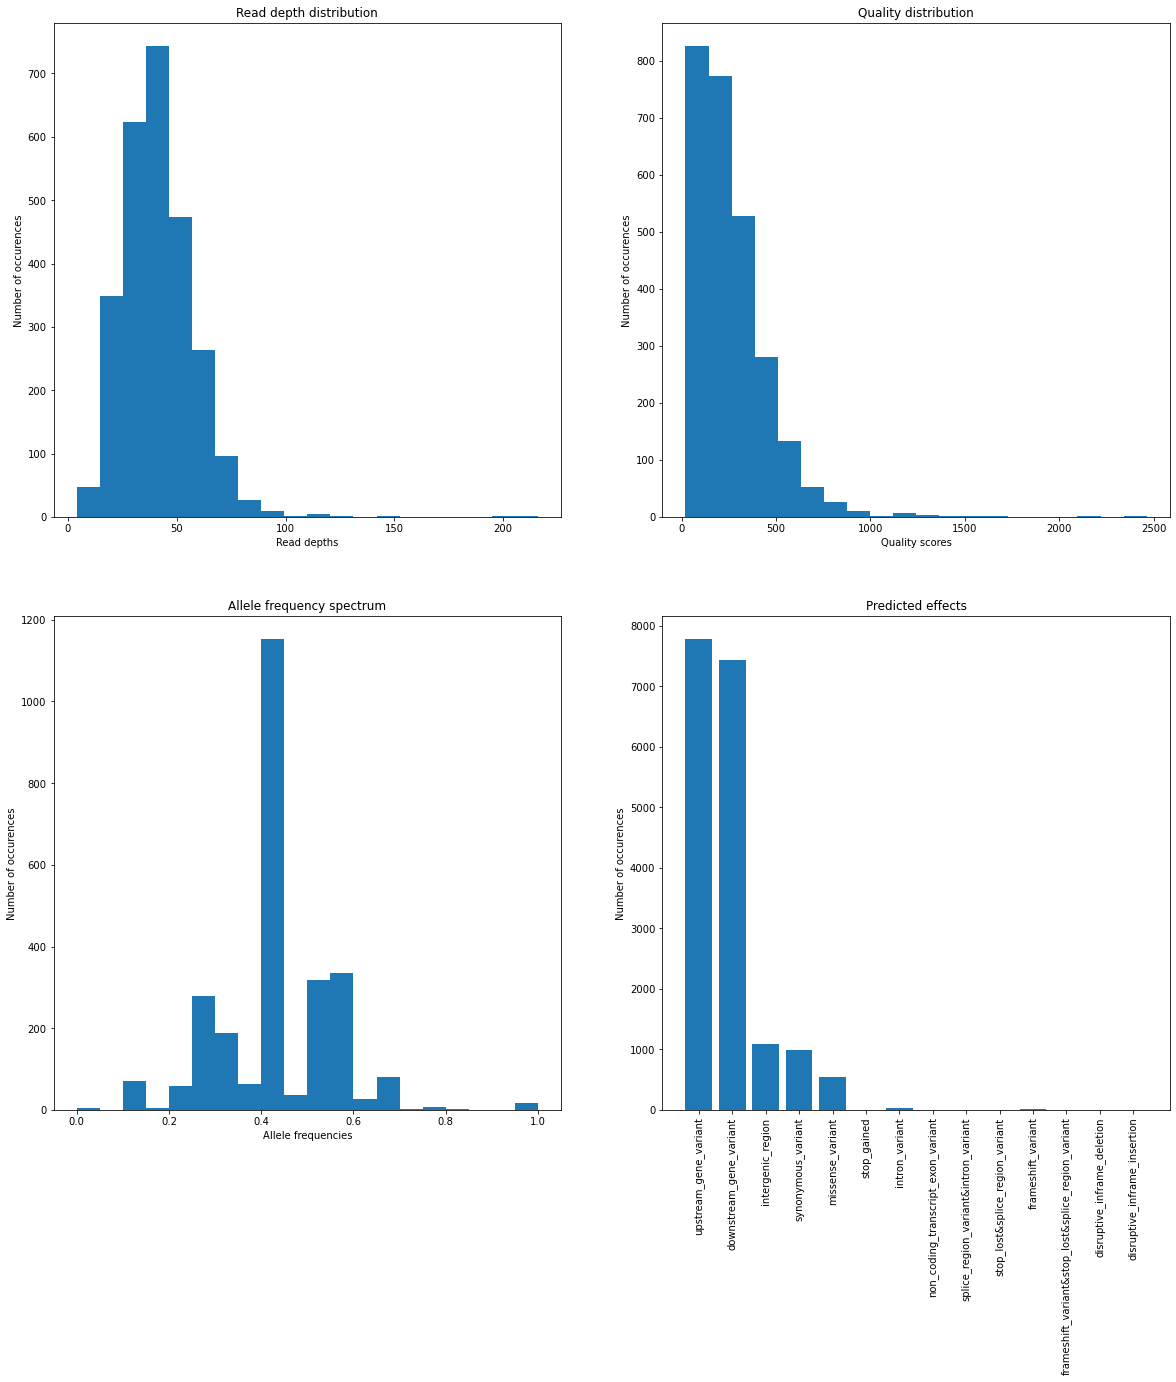

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, squeeze = False)

ax[0][0].hist(read_depths, bins=20)
ax[0][0].set_title("Read depth distribution")
ax[0][0].set_xlabel("Read depths")
ax[0][0].set_ylabel("Number of occurences")

ax[0][1].hist(quals, bins=20)
ax[0][1].set_title("Quality distribution")
ax[0][1].set_xlabel("Quality scores")
ax[0][1].set_ylabel("Number of occurences")

ax[1][0].hist(allele_freqs, bins=20)
ax[1][0].set_title("Allele frequency spectrum")
ax[1][0].set_xlabel("Allele frequencies")
ax[1][0].set_ylabel("Number of occurences")

ax[1][1].bar(snpeffs.keys(), snpeffs.values())
ax[1][1].set_title("Predicted effects")
ax[1][1].set_ylabel("Number of occurences")

plt.xticks(rotation=90)
plt.show()